In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
dd = pd.ExcelFile('C:/Users/4033_2/Desktop/ma/new proj/excel/data.xlsx')

In [3]:
dd.sheet_names

['Trafikhändelser']

In [4]:
data = dd.parse('Trafikhändelser',names=['report_id','year','year_and_month','day_in_month','date',
                                        'month_name','weekday','hour','quarter','time_to_finish','event_type_compounded',
                                        'source','location_description','action_plan_name','notes','county_number',
                                        'tass','x','y'])

In [5]:
data.head()

,report_id,year,year_and_month,day_in_month,date,month_name,weekday,hour,quarter,time_to_finish,event_type_compounded,source,location_description,action_plan_name,notes,county_number,tass,x,y
0,58267510,2016,201611,1,2016-11-01,November,Tisdag,9,45,1850.783333,Vägskada,Björn Ö 0733721282,Väg 1032 från Rävsnäs till Aspnäs båda riktnin...,VÄGSKADA,Kollapsad vägtrumma.,2,NaN,728514,6629045
1,58267510,2016,201611,1,2016-11-01,November,Tisdag,9,45,NaN,Vägskada,Björn Ö 0733721282,Väg 1032 från Rävsnäs till Aspnäs båda riktnin...,VÄGSKADA,Kollapsad vägtrumma.,2,NaN,728514,6629045
2,45236546,2016,201601,20,2016-01-20,Januari,Onsdag,14,30,14.050000,Bärgning,[SST 2] NOLL TJUGO; B-NUMMER (0706033920) ...,E18 från Aspnäs till Kapellskär båda riktninga...,HINDER,"Bärgning av lastbil, Begränsad framkomlighet.",2,NaN,728096,6627474
3,59075885,2016,201611,27,2016-11-27,November,Söndag,15,45,167.033333,Nedfallna träd,Do åker,Väg 1032 från Gräddö till Rävsnäs båda riktnin...,HINDER,Träd över vägbana,2,NaN,727574,6631551
4,64093429,2017,201706,23,2017-06-23,Juni,Fredag,17,45,44.516667,Olycka,SSRC RAPS-45,Väg 1032 från Gräddö till Rävsnäs båda riktnin...,NaN,Singelolycka,2,NaN,727574,6631551


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40579 entries, 0 to 40578
Data columns (total 19 columns):
report_id                40579 non-null int64
year                     40579 non-null int64
year_and_month           40579 non-null int64
day_in_month             40579 non-null int64
date                     40579 non-null datetime64[ns]
month_name               40579 non-null object
weekday                  40579 non-null object
hour                     40579 non-null int64
quarter                  40579 non-null int64
time_to_finish           39748 non-null float64
event_type_compounded    40579 non-null object
source                   28506 non-null object
location_description     40579 non-null object
action_plan_name         37676 non-null object
notes                    29128 non-null object
county_number            40579 non-null int64
tass                     16499 non-null float64
x                        40500 non-null object
y                        40500 non-null ob

In [7]:
data.describe()

,report_id,year,year_and_month,day_in_month,hour,quarter,time_to_finish,county_number,tass
count,4.057900e+04,40579.000000,40579.000000,40579.000000,40579.000000,40579.000000,39748.000000,40579.0,16499.0
mean,5.905018e+07,2016.578008,201664.209690,15.746667,12.681584,22.288376,69.696818,2.0,1.0
std,6.917695e+06,0.568659,56.373501,8.776127,5.284663,16.790695,1152.323178,0.0,0.0
min,4.466100e+07,2016.000000,201601.000000,1.000000,0.000000,0.000000,-37251.583333,2.0,1.0
25%,5.378010e+07,2016.000000,201607.000000,8.000000,9.000000,0.000000,12.066667,2.0,1.0
50%,6.035248e+07,2017.000000,201701.000000,16.000000,13.000000,15.000000,25.200000,2.0,1.0
75%,6.473996e+07,2017.000000,201708.000000,23.000000,17.000000,30.000000,52.366667,2.0,1.0
max,6.936099e+07,2018.000000,201801.000000,31.000000,23.000000,45.000000,101256.433333,2.0,1.0


In [8]:
data.event_type_compounded.unique()

array(['Vägskada', 'Bärgning', 'Nedfallna träd', 'Olycka',
       'Djur på vägbanan', 'Föremål på vägbanan',
       'Bärgning av tungt fordon', 'Problem i färjetrafiken',
       'Går enligt tidtabell', 'Lågt hängande ledning', 'Halt väglag',
       'Stillastående fordon', 'Rörlig bro ur funktion', 'Nedfallande is',
       'Brinnande fordon', 'Olja på vägen', 'Översvämning',
       'Restriktioner för längre fordon', 'Utsläpp på vägen',
       'Människor på vägbanan', 'Långsam kö', 'Kötid längre än 1 timma',
       'Stort evenemang', 'Uppröjningsarbete', 'Omfattande brand',
       'Stopp pga reparation', 'Fordonskolonn', 'Vädervarning',
       'Trafiksignaler ur funktion', 'Långsamtgående fordon',
       'Trafikproblem', 'Stängd tunnelinfart', 'Dispenstransport',
       'Fordon på fel körbana',
       'Trafiksignal högpriofel m trafikpåverkan', 'Fordonskonvoj',
       'Kötid längre än 30 minuter', 'Trafiksignal högpriofel',
       'Fel vid järnvägskorsning', 'Lågt bländande sol', 'Gasläc

In [13]:
len(data.notes.unique())

13406

In [14]:
len(data.action_plan_name.unique())

342

In [15]:
len(data.location_description.unique())

5601

In [29]:
grouped_events = data.groupby('event_type_compounded')

In [37]:
data.year.count()

40579

In [42]:
data.year.unique()

array([2016, 2017, 2018], dtype=int64)

In [68]:
incidents = data.groupby('year').event_type_compounded.count()

In [69]:
incidents

year
2016    18736
2017    20231
2018     1612
Name: event_type_compounded, dtype: int64

Text(0,0.5,'Number of Accidents per Year')

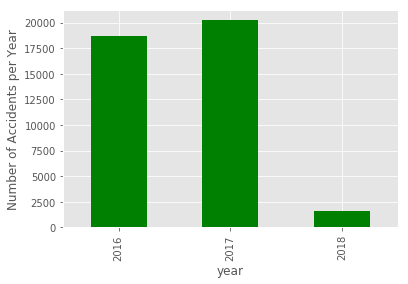

In [85]:
incidents.plot.bar(color='green')
plt.ylabel('Number of Accidents per Year')

In [78]:
data_2016 = data[data.year == 2016]

Text(0.5,1,'2016 Incident Data')

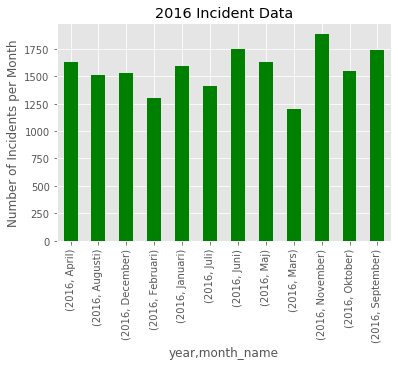

In [86]:
data_2016.groupby(['year','month_name']).event_type_compounded.count().plot.bar(color='green')
plt.ylabel('Number of Incidents per Month')
plt.title('2016 Incident Data')

Text(0.5,1,'2017 Incident Data')

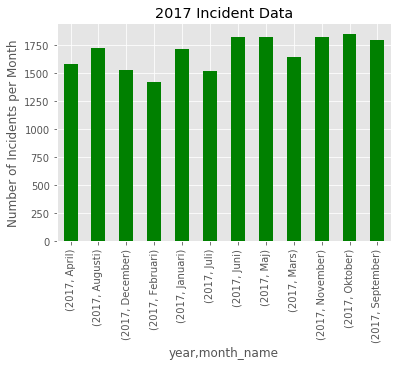

In [88]:
data_2017 = data[data.year == 2017]
data_2017.groupby(['year','month_name']).event_type_compounded.count().plot.bar(color='green')
plt.ylabel('Number of Incidents per Month')
plt.title('2017 Incident Data')

Text(0.5,1,'2018 Incident Data')

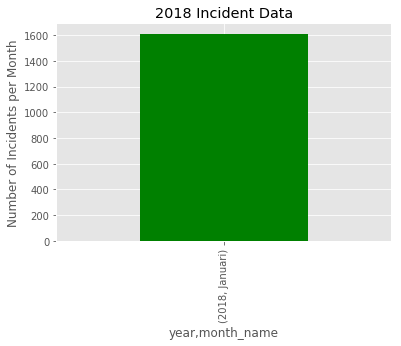

In [89]:
data_2018 = data[data.year == 2018]
data_2018.groupby(['year','month_name']).event_type_compounded.count().plot.bar(color='green')
plt.ylabel('Number of Incidents per Month')
plt.title('2018 Incident Data')

Text(0.5,1,'Workday Incident Data')

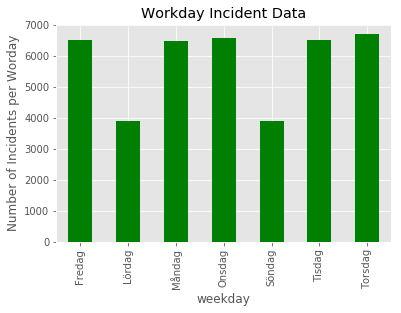

In [92]:
data.groupby('weekday').event_type_compounded.count().plot.bar(color='green')
plt.ylabel('Number of Incidents per Worday')
plt.title('Workday Incident Data')

In [63]:
data.event_type_compounded.value_counts()

Stillastående fordon                        23794
Olycka                                       6540
Föremål på vägbanan                          4793
Stängd tunnelinfart                           965
Djur på vägbanan                              801
Bärgning                                      762
Broöppning                                    648
Långsam kö                                    426
Nedfallna träd                                333
Brinnande fordon                              206
Stort evenemang                               169
Problem i färjetrafiken                       137
Olja på vägen                                 133
Översvämning                                  125
Bärgning av tungt fordon                      120
Människor på vägbanan                         116
Vägskada                                      111
Lågt bländande sol                             54
Rörlig bro ur funktion                         38
Trafiksignal högpriofel m trafikpåverkan       36


Text(0,0.5,'Number of incidents per Event Type Compounded')

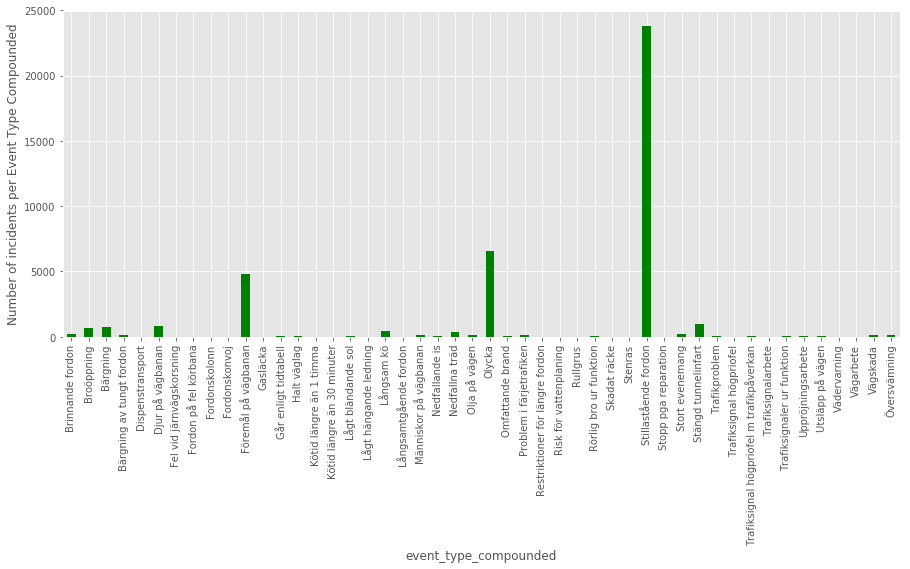

In [103]:
data.groupby('event_type_compounded').event_type_compounded.count().plot.bar(color='green',figsize=(15,6))
plt.ylabel('Number of incidents per Event Type Compounded')

In [119]:
data_1 = data.iloc[:40183,17:]
data_1.x = pd.to_numeric(data_1.x)
data_1.y = pd.to_numeric(data_1.y)

Text(0.5,1,'Distribution of Points of Incidents')

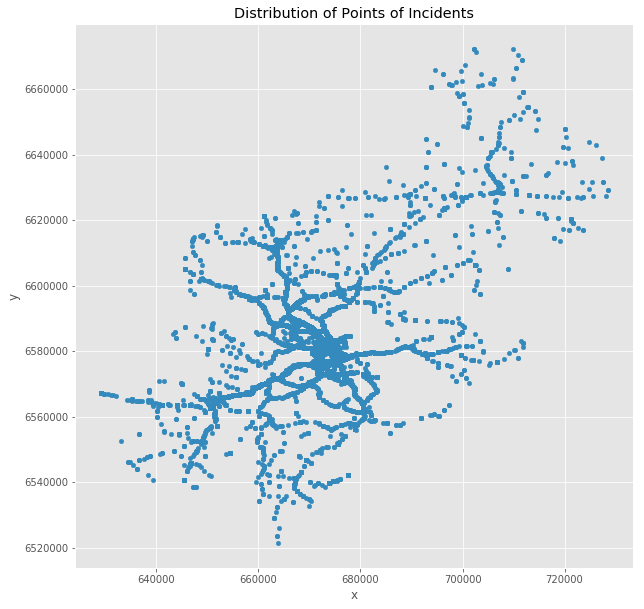

In [123]:
data_1.plot.scatter(x='x',y='y',figsize=(10,10))
plt.title('Distribution of Points of Incidents')

In [126]:
ks = range(1,100)
inertia = []

for val in ks:
    model = KMeans(n_clusters=val)
    model.fit(data_1)
    inertia.append(model.inertia_)

Text(0,0.5,'inertia')

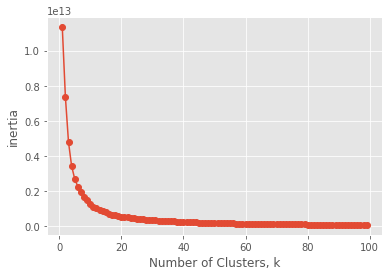

In [133]:
plt.plot(ks, inertia, '-o')
plt.xlabel('Number of Clusters, k')
plt.ylabel('inertia')
#plt.xticks(ks)